In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [110]:
df_train = pd.read_csv('/Users/generalassembly/Documents/Groupproject/Aedes_aegypti_project/assets/train.csv')
df_spray = pd.read_csv('/Users/generalassembly/Documents/Groupproject/Aedes_aegypti_project/assets/spray.csv')
df_weather= pd.read_csv('/Users/generalassembly/Documents/Groupproject/Aedes_aegypti_project/assets/weather.csv')
df_test= pd.read_csv('/Users/generalassembly/Documents/Groupproject/Aedes_aegypti_project/assets/test.csv')



In [111]:
df_train.shape

(10506, 12)

In [112]:
df_weather.shape

(2944, 22)

In [113]:
df_spray.shape

(14835, 4)

In [114]:
df_spray.head()

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


In [115]:
df_train.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


In [116]:
df_weather.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9


In [117]:
df_weather.columns


Index([u'Station', u'Date', u'Tmax', u'Tmin', u'Tavg', u'Depart', u'DewPoint',
       u'WetBulb', u'Heat', u'Cool', u'Sunrise', u'Sunset', u'CodeSum',
       u'Depth', u'Water1', u'SnowFall', u'PrecipTotal', u'StnPressure',
       u'SeaLevel', u'ResultSpeed', u'ResultDir', u'AvgSpeed'],
      dtype='object')

In [118]:
df_train.columns

Index([u'Date', u'Address', u'Species', u'Block', u'Street', u'Trap',
       u'AddressNumberAndStreet', u'Latitude', u'Longitude',
       u'AddressAccuracy', u'NumMosquitos', u'WnvPresent'],
      dtype='object')

In [119]:
df_weather.isnull().any()


Station        False
Date           False
Tmax           False
Tmin           False
Tavg           False
Depart         False
DewPoint       False
WetBulb        False
Heat           False
Cool           False
Sunrise        False
Sunset         False
CodeSum        False
Depth          False
Water1         False
SnowFall       False
PrecipTotal    False
StnPressure    False
SeaLevel       False
ResultSpeed    False
ResultDir      False
AvgSpeed       False
dtype: bool

In [120]:
df_spray.isnull().any()

Date         False
Time          True
Latitude     False
Longitude    False
dtype: bool

In [121]:
df_train.isnull().any()

Date                      False
Address                   False
Species                   False
Block                     False
Street                    False
Trap                      False
AddressNumberAndStreet    False
Latitude                  False
Longitude                 False
AddressAccuracy           False
NumMosquitos              False
WnvPresent                False
dtype: bool

In [122]:
df_spray.isnull().sum()

Date           0
Time         584
Latitude       0
Longitude      0
dtype: int64

In [123]:
df_spray = df_spray.dropna()

In [124]:
df_spray.shape

(14251, 4)

## generate a big dataset

In [125]:
import copy
df_weather_new = copy.deepcopy(df_weather)
df_train_new = copy.deepcopy(df_train)
df_spray_new = copy.deepcopy(df_spray)


In [126]:
df_weather_new.columns

Index([u'Station', u'Date', u'Tmax', u'Tmin', u'Tavg', u'Depart', u'DewPoint',
       u'WetBulb', u'Heat', u'Cool', u'Sunrise', u'Sunset', u'CodeSum',
       u'Depth', u'Water1', u'SnowFall', u'PrecipTotal', u'StnPressure',
       u'SeaLevel', u'ResultSpeed', u'ResultDir', u'AvgSpeed'],
      dtype='object')

In [127]:
## drop the unnecessery columns
df_drop=df_weather_new.drop([ u'Depart',u'WetBulb', u'Heat', u'Cool', u'CodeSum', u'Depth', u'Water1', u'SnowFall', u'StnPressure',u'SeaLevel', u'ResultSpeed', u'ResultDir'],axis=1)

In [128]:
df_drop.head()

,Station,Date,Tmax,Tmin,Tavg,DewPoint,Sunrise,Sunset,PrecipTotal,AvgSpeed
0,1,2007-05-01,83,50,67,51,0448,1849,0.00,9.2
1,2,2007-05-01,84,52,68,51,-,-,0.00,9.6
2,1,2007-05-02,59,42,51,42,0447,1850,0.00,13.4
3,2,2007-05-02,60,43,52,42,-,-,0.00,13.4
4,1,2007-05-03,66,46,56,40,0446,1851,0.00,11.9


In [129]:
## keep the first station data
df_drop_frist_station = df_drop[df_drop.Station !=2]
df_drop_frist_station.head()

,Station,Date,Tmax,Tmin,Tavg,DewPoint,Sunrise,Sunset,PrecipTotal,AvgSpeed
0,1,2007-05-01,83,50,67,51,0448,1849,0.00,9.2
2,1,2007-05-02,59,42,51,42,0447,1850,0.00,13.4
4,1,2007-05-03,66,46,56,40,0446,1851,0.00,11.9
6,1,2007-05-04,66,49,58,41,0444,1852,T,10.8
8,1,2007-05-05,66,53,60,38,0443,1853,T,12.0


In [130]:
## clean the PrecipTotal column
df_drop_frist_station.ix[df_drop_frist_station.PrecipTotal.str.contains("T"), 'PrecipTotal'] = "0.0"

In [131]:
df_drop_frist_station.head()

,Station,Date,Tmax,Tmin,Tavg,DewPoint,Sunrise,Sunset,PrecipTotal,AvgSpeed
0,1,2007-05-01,83,50,67,51,0448,1849,0.00,9.2
2,1,2007-05-02,59,42,51,42,0447,1850,0.00,13.4
4,1,2007-05-03,66,46,56,40,0446,1851,0.00,11.9
6,1,2007-05-04,66,49,58,41,0444,1852,0.0,10.8
8,1,2007-05-05,66,53,60,38,0443,1853,0.0,12.0


In [132]:
Sunrise_minutes=[float(x[0:2])*60+float(x[2:4]) for x in df_drop_frist_station['Sunrise']]
Sunset_minutes=[float(x[0:2])*60+float(x[2:4]) for x in df_drop_frist_station['Sunset']]


In [133]:
from operator import sub
length_of_day = map(sub, Sunset_minutes, Sunrise_minutes)
series = pd.Series(length_of_day)
df_drop_frist_station['length_of_day'] = series.values
df_drop_frist_station.head()

/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Station,Date,Tmax,Tmin,Tavg,DewPoint,Sunrise,Sunset,PrecipTotal,AvgSpeed,length_of_day
0,1,2007-05-01,83,50,67,51,0448,1849,0.00,9.2,841.0
2,1,2007-05-02,59,42,51,42,0447,1850,0.00,13.4,843.0
4,1,2007-05-03,66,46,56,40,0446,1851,0.00,11.9,845.0
6,1,2007-05-04,66,49,58,41,0444,1852,0.0,10.8,848.0
8,1,2007-05-05,66,53,60,38,0443,1853,0.0,12.0,850.0


In [134]:
df_drop_frist_station.columns

Index([u'Station', u'Date', u'Tmax', u'Tmin', u'Tavg', u'DewPoint', u'Sunrise',
       u'Sunset', u'PrecipTotal', u'AvgSpeed', u'length_of_day'],
      dtype='object')

In [135]:
df_drop_frist_station=df_drop_frist_station.drop([u'Station', u'Sunrise', u'Sunset'],axis=1)

In [136]:
df_drop_frist_station.head()

,Date,Tmax,Tmin,Tavg,DewPoint,PrecipTotal,AvgSpeed,length_of_day
0,2007-05-01,83,50,67,51,0.00,9.2,841.0
2,2007-05-02,59,42,51,42,0.00,13.4,843.0
4,2007-05-03,66,46,56,40,0.00,11.9,845.0
6,2007-05-04,66,49,58,41,0.0,10.8,848.0
8,2007-05-05,66,53,60,38,0.0,12.0,850.0


In [137]:

df_merge=pd.merge(df_train, df_drop_frist_station, on='Date', how='left')

In [138]:
df_merge.head()


,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,Tmax,Tmin,Tavg,DewPoint,PrecipTotal,AvgSpeed,length_of_day
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,88,60,74,58,0.00,6.5,896.0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,88,60,74,58,0.00,6.5,896.0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0,88,60,74,58,0.00,6.5,896.0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0,88,60,74,58,0.00,6.5,896.0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0,88,60,74,58,0.00,6.5,896.0


In [139]:
df_merge.isnull().sum()

Date                      0
Address                   0
Species                   0
Block                     0
Street                    0
Trap                      0
AddressNumberAndStreet    0
Latitude                  0
Longitude                 0
AddressAccuracy           0
NumMosquitos              0
WnvPresent                0
Tmax                      0
Tmin                      0
Tavg                      0
DewPoint                  0
PrecipTotal               0
AvgSpeed                  0
length_of_day             0
dtype: int64

In [140]:
df_merge["Date"] = pd.to_datetime(df_merge["Date"])

In [141]:
df_merge.to_csv('out_train_v2.csv')

In [142]:
df_merge.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,Tmax,Tmin,Tavg,DewPoint,PrecipTotal,AvgSpeed,length_of_day
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,88,60,74,58,0.00,6.5,896.0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,88,60,74,58,0.00,6.5,896.0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0,88,60,74,58,0.00,6.5,896.0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0,88,60,74,58,0.00,6.5,896.0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0,88,60,74,58,0.00,6.5,896.0


In [143]:
df_merge.shape

(10506, 19)

In [144]:
df_merge.columns

Index([u'Date', u'Address', u'Species', u'Block', u'Street', u'Trap',
       u'AddressNumberAndStreet', u'Latitude', u'Longitude',
       u'AddressAccuracy', u'NumMosquitos', u'WnvPresent', u'Tmax', u'Tmin',
       u'Tavg', u'DewPoint', u'PrecipTotal', u'AvgSpeed', u'length_of_day'],
      dtype='object')

In [145]:
df_merge.dtypes

Date                      datetime64[ns]
Address                           object
Species                           object
Block                              int64
Street                            object
Trap                              object
AddressNumberAndStreet            object
Latitude                         float64
Longitude                        float64
AddressAccuracy                    int64
NumMosquitos                       int64
WnvPresent                         int64
Tmax                               int64
Tmin                               int64
Tavg                              object
DewPoint                           int64
PrecipTotal                       object
AvgSpeed                          object
length_of_day                    float64
dtype: object

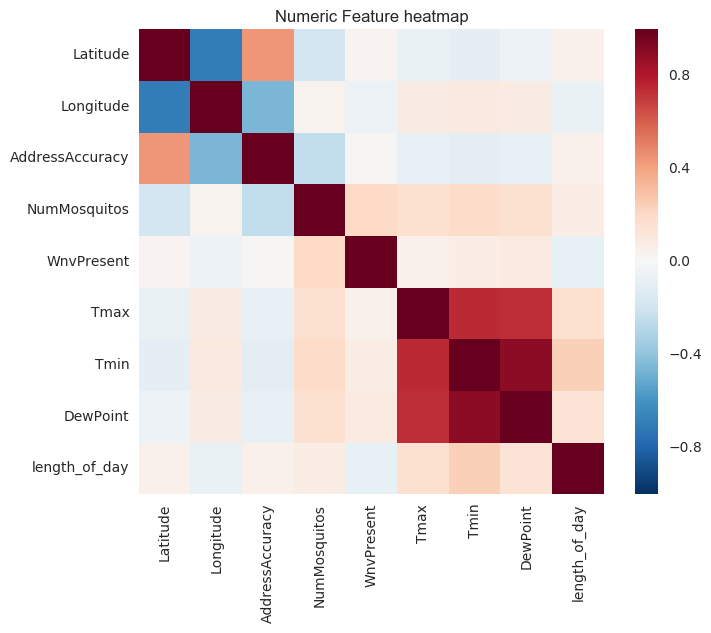

In [146]:
import seaborn as sns
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(8,6))
correlation = df_merge.select_dtypes(include=['float64','int64']).iloc[:,1:].corr()
sns.heatmap(correlation,ax=ax,vmax=1,square=True)
plt.title('Numeric Feature heatmap')



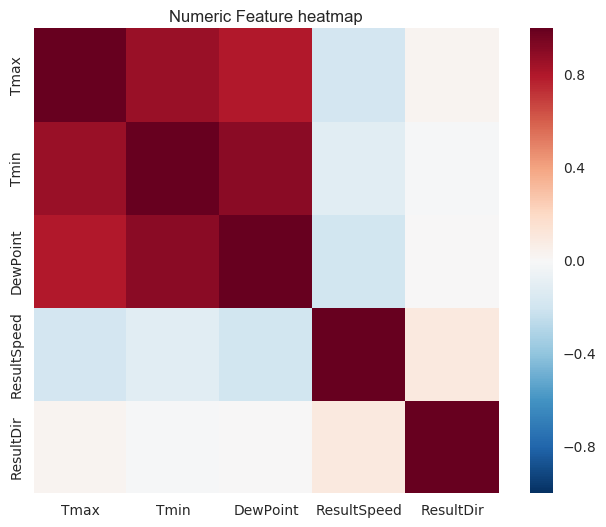

In [149]:
import seaborn as sns
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(8,6))
correlation = df_weather_new.select_dtypes(include=['float64','int64']).iloc[:,1:].corr()
sns.heatmap(correlation,ax=ax,vmax=1,square=True)
plt.title('Numeric Feature heatmap')



In [147]:
df_spray.head()

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858
